Want to try to make score plots (histograms of the probability of the classifications), first for my existing models, then for the rho stuff

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/'

In [8]:
#the no global features model:
file = np.load(data_path+'nn_splitdata_kd.npz')
model_nog = tf.keras.models.load_model(data_path+'w8_pfn_noglob_2.hdf5')


In [9]:
X_test = file['arr_2']
Y_test = file['arr_5']
eta_test = file['arr_11']

In [11]:
eta_ranges = np.arange(0., 3.1, .1)+.05

selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

eta_sel = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [10]:
from Week7_PFNutils import *

In [12]:
fps, tps, auc, preds = metrics_ng(model_nog, X_test, Y_test, eta_sel) #note: this DID work b/c the last one of
                                                        #eta_sel uses all of the data. so this is correct but
                                                        #it has been updated to send a list of all in the future

PFN AUC: 0.9756198353399985
PFN AUC: 0.9800460395632197
PFN AUC: 0.9774536686902162
PFN AUC: 0.9767919066331545
PFN AUC: 0.9785564443776689
PFN AUC: 0.9751944364343381
PFN AUC: 0.9795972082071982
PFN AUC: 0.9782195123414081
PFN AUC: 0.9754422748814293
PFN AUC: 0.9749136787883531
PFN AUC: 0.9755248769098924
PFN AUC: 0.9734319096575829
PFN AUC: 0.9704580047692882
PFN AUC: 0.9581635535271382
PFN AUC: 0.9126034934535657
PFN AUC: 0.92386083718798
PFN AUC: 0.9441327317295478
PFN AUC: 0.9362920341333927
PFN AUC: 0.9331082283804285
PFN AUC: 0.935227548062048
PFN AUC: 0.9458883643228957
PFN AUC: 0.9516104237039722
PFN AUC: 0.9558812031744149
PFN AUC: 0.9549335616113804
PFN AUC: 0.9507365497253893
PFN AUC: 0.9594866700035047
PFN AUC: 0.983491717772633
PFN AUC: 0.98139857253069
PFN AUC: 0.9827258322037904
PFN AUC: 0.9883856300818598
PFN AUC: 0.9626943900397682


In [15]:
prob1, prob2 = preds.T

In [21]:
lab1, lab2 = Y_test.T

In [26]:
prob1, lab1

(array([0.97251976, 0.96926427, 0.49274525, ..., 0.52816856, 0.57047033,
        0.5318391 ], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 0.], dtype=float32))

(array([149849.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 150151.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

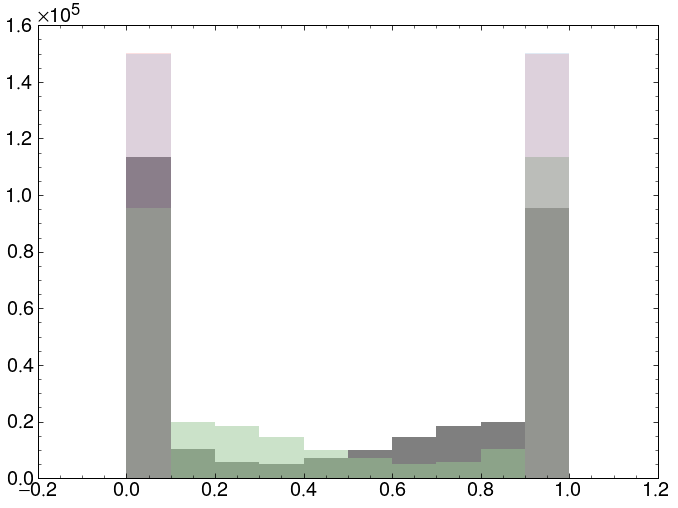

In [24]:
plt.hist(prob1, color='k', alpha=.5)
plt.hist(prob2, alpha=.5)
plt.hist(lab1, alpha=.2)
plt.hist(lab2, alpha=.2)

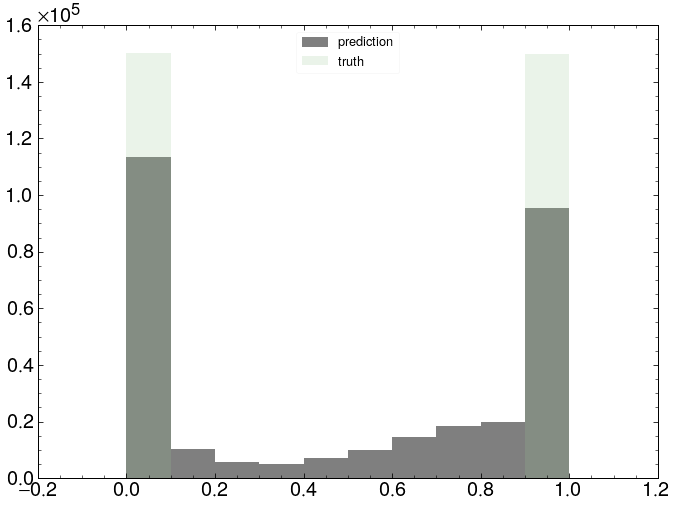

In [25]:
plt.hist(prob1, color='k', alpha=.5, label='prediction')
plt.hist(lab1, alpha=.2, label='truth')
plt.legend()

In [43]:
pip_mask = lab1 == 1 #where the label is 1, this is pi p/m, where its zero that should be pi0
pi0_mask = lab1 == 0

pi0_mask

array([False, False, False, ..., False, False,  True])

In [58]:
len(pip_mask), len(pi0_mask)

(300000, 300000)

In [44]:
pi0_pred = prob1[pi0_mask]
pip_pred = prob1[pip_mask] #now they're different sizes; the idea here is to select all the predictions that 
                        #correspond to true pi+ or pi0 !! hence in the plot they're mostly correct, but some spread
                        # in the center between the peaks:)

In [59]:
len(pi0_pred), len(pip_pred)

(150151, 149849)

(array([ 2544.,  1564.,  1593.,  1978.,  3510.,  5733.,  9561., 13882.,
        16740., 92744.]),
 array([6.3076895e-09, 1.0000001e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

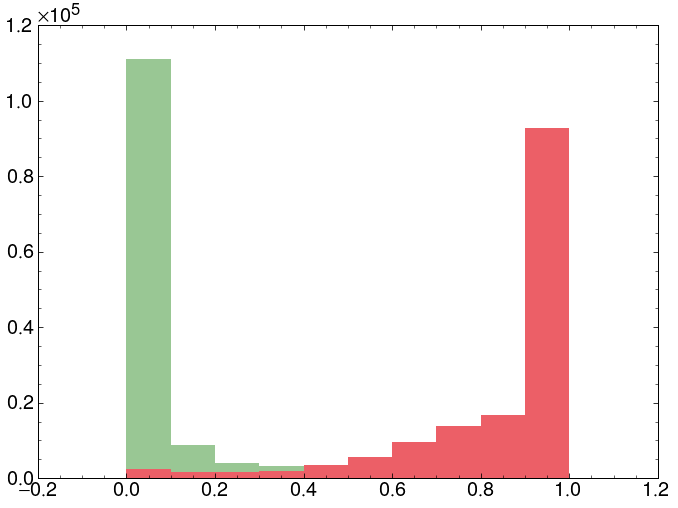

In [45]:
plt.hist(pi0_pred)
plt.hist(pip_pred)

In [46]:
#reproduce plot for ranges in eta:
#I thinnk I need to do this twice for both masks? good enough to just get it working at first I think
eta_pi0 = eta_test[pi0_mask] #since they're different lengths now, need to do both separately
eta_pip = eta_test[pip_mask]

selec1 = abs(eta_pi0) < 0.5
selec2 = (abs(eta_pi0) >= .5) & (abs(eta_pi0) < 1.)
selec3 = (abs(eta_pi0) >= 1.) & (abs(eta_pi0) < 1.5)
selec4 = (abs(eta_pi0) >= 1.5) & (abs(eta_pi0) < 2.)
selec5 = (abs(eta_pi0) >= 2.) & (abs(eta_pi0) < 2.5)
selec6 = (abs(eta_pi0) >= 2.5) & (abs(eta_pi0) < 3.1)

eta_bins_0 = [selec1, selec2, selec3, selec4, selec5, selec6]

selec1 = abs(eta_pip) < 0.5
selec2 = (abs(eta_pip) >= .5) & (abs(eta_pip) < 1.)
selec3 = (abs(eta_pip) >= 1.) & (abs(eta_pip) < 1.5)
selec4 = (abs(eta_pip) >= 1.5) & (abs(eta_pip) < 2.)
selec5 = (abs(eta_pip) >= 2.) & (abs(eta_pip) < 2.5)
selec6 = (abs(eta_pip) >= 2.5) & (abs(eta_pip) < 3.1)

eta_bins_p = [selec1, selec2, selec3, selec4, selec5, selec6]

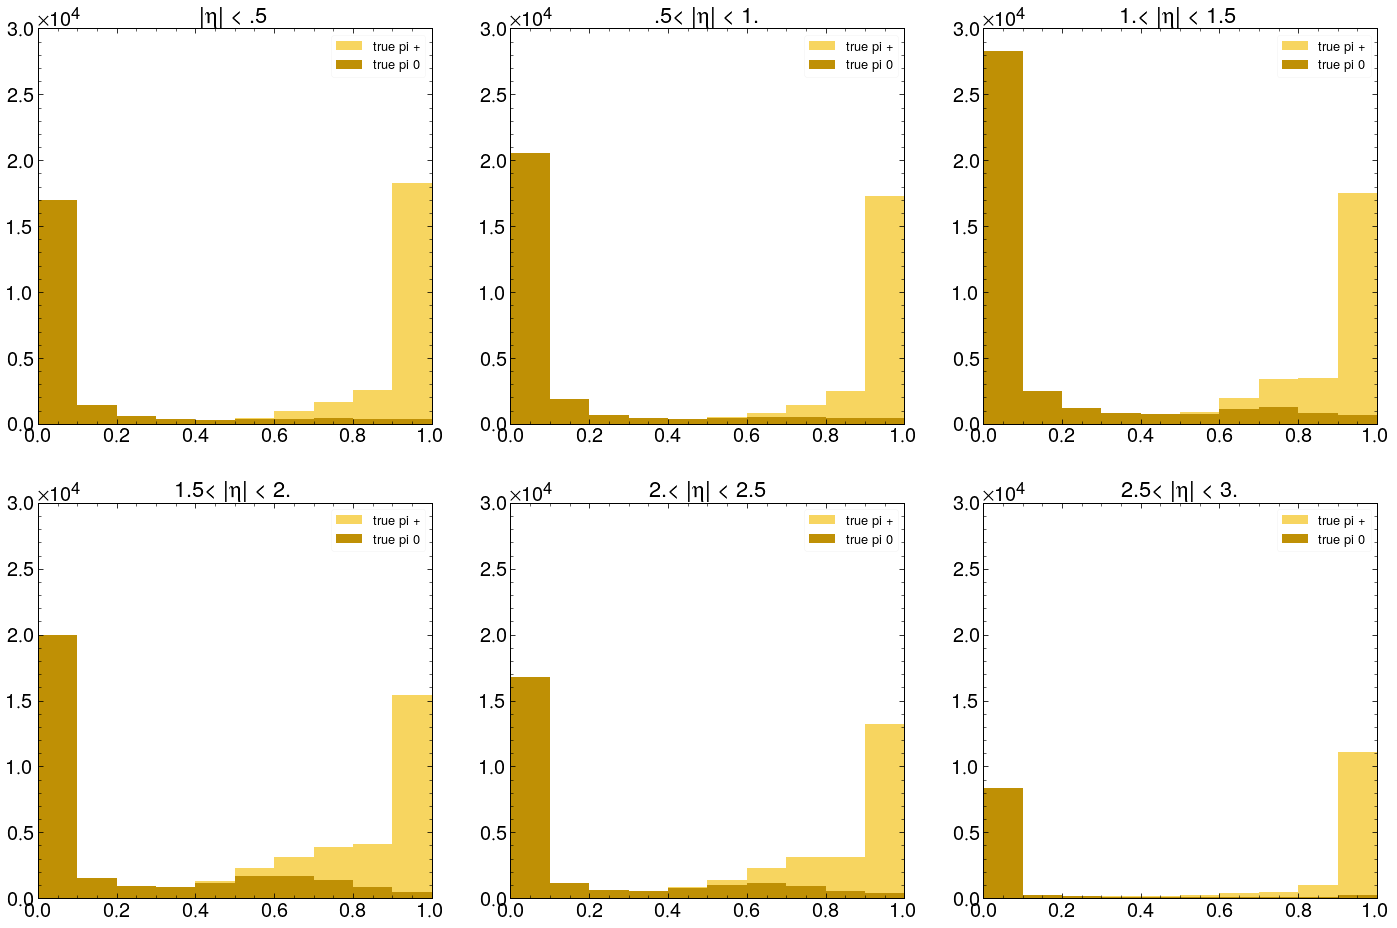

In [60]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=[24,16])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
ranges = ['|$\eta$| < .5', '.5< |$\eta$| < 1.', '1.< |$\eta$| < 1.5', '1.5< |$\eta$| < 2.', '2.< |$\eta$| < 2.5', '2.5< |$\eta$| < 3.']

for i in range(len(eta_bins_0)):
    axes[i].set_xlim(0,1)
    axes[i].set_ylim(0,3e4)
    axes[i].set_title(ranges[i])
    axes[i].hist(pip_pred[eta_bins_p[i]], color='xkcd:light mustard', label='true pi +')
    axes[i].hist(pi0_pred[eta_bins_0[i]], color='xkcd:ochre', label='true pi 0') #so this IS correct, I'm pretty sure
    axes[i].legend()

In [49]:
#turn this into a util function:
def scorehist(preds, Y_test, eta_test):
    prob1, prob2 = preds.T
    lab1, lab2 = Y_test.T
    pip_mask = lab1 == 1 #note I'm not sure if I have these mixed up or not it might be the other way around lol
    pi0_mask = lab1 == 0
    pi0_pred = prob1[pi0_mask]
    pip_pred = prob1[pip_mask]
    
    #I still think I need both eta bins tho I'm sure there's a nicer way to do this
    eta_pi0 = eta_test[pi0_mask]
    eta_pip = eta_test[pip_mask]

    selec1 = abs(eta_pi0) < 0.5
    selec2 = (abs(eta_pi0) >= .5) & (abs(eta_pi0) < 1.)
    selec3 = (abs(eta_pi0) >= 1.) & (abs(eta_pi0) < 1.5)
    selec4 = (abs(eta_pi0) >= 1.5) & (abs(eta_pi0) < 2.)
    selec5 = (abs(eta_pi0) >= 2.) & (abs(eta_pi0) < 2.5)
    selec6 = (abs(eta_pi0) >= 2.5) & (abs(eta_pi0) < 3.1)

    eta_bins_0 = [selec1, selec2, selec3, selec4, selec5, selec6]

    selec1 = abs(eta_pip) < 0.5
    selec2 = (abs(eta_pip) >= .5) & (abs(eta_pip) < 1.)
    selec3 = (abs(eta_pip) >= 1.) & (abs(eta_pip) < 1.5)
    selec4 = (abs(eta_pip) >= 1.5) & (abs(eta_pip) < 2.)
    selec5 = (abs(eta_pip) >= 2.) & (abs(eta_pip) < 2.5)
    selec6 = (abs(eta_pip) >= 2.5) & (abs(eta_pip) < 3.1)

    eta_bins_p = [selec1, selec2, selec3, selec4, selec5, selec6]
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=[24,16])
    axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    ranges = ['|$\eta$| < .5', '.5< |$\eta$| < 1.', '1.< |$\eta$| < 1.5', '1.5< |$\eta$| < 2.', '2.< |$\eta$| < 2.5', '2.5< |$\eta$| < 3.']

    for i in range(len(eta_bins_0)):
        axes[i].set_xlim(0,1)
        axes[i].set_ylim(0,3e4)
        axes[i].set_title(ranges[i])
        axes[i].hist(pip_pred[eta_bins_p[i]], color='xkcd:light mustard')
        axes[i].hist(pi0_pred[eta_bins_0[i]], color='xkcd:ochre')

In [50]:
s=2

In [51]:
#I did the preds/sel wrong (was only passing it the latest set of predictions) so I'm gonna redo

In [54]:
len(preds), len(X_test)

(300000, 300000)

In [55]:
len(X_test[eta_sel[0]])

9191

In [56]:
for selection in eta_sel:
    print(len(X_test[selection])) #OH SO THIS DID ***** WORK!!!!

9191
9158
9435
9245
9473
9589
9875
9883
10241
10502
13336
11793
10837
11025
21026
17635
10882
11557
11250
11374
10396
10190
10181
9811
8591
6693
4824
4321
4129
3557
300000


In [57]:
PREds = model_nog.predict(X_test[eta_sel[0]], batch_size=1000)
len(PREds)

9191